# **Chapter 2. Preprocessing**
Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from matplotlib import style

## **Read data into dataframe**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/qhuy1901/DataMining_DataCoSupplyChainDataset/main/DataCoSupplyChainDataset.csv', header= 0, encoding='unicode_escape')
pd.set_option('display.max_columns', None)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## **Exploratory Data Analysis (EDA)**

### **View dataset infomation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### **Describe the components of the data**

Use describe() function to statistics of quantitative attributes such as count of values, maximum, minimum, mean, standard deviation, quartile...

In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


### **Check data distribution**

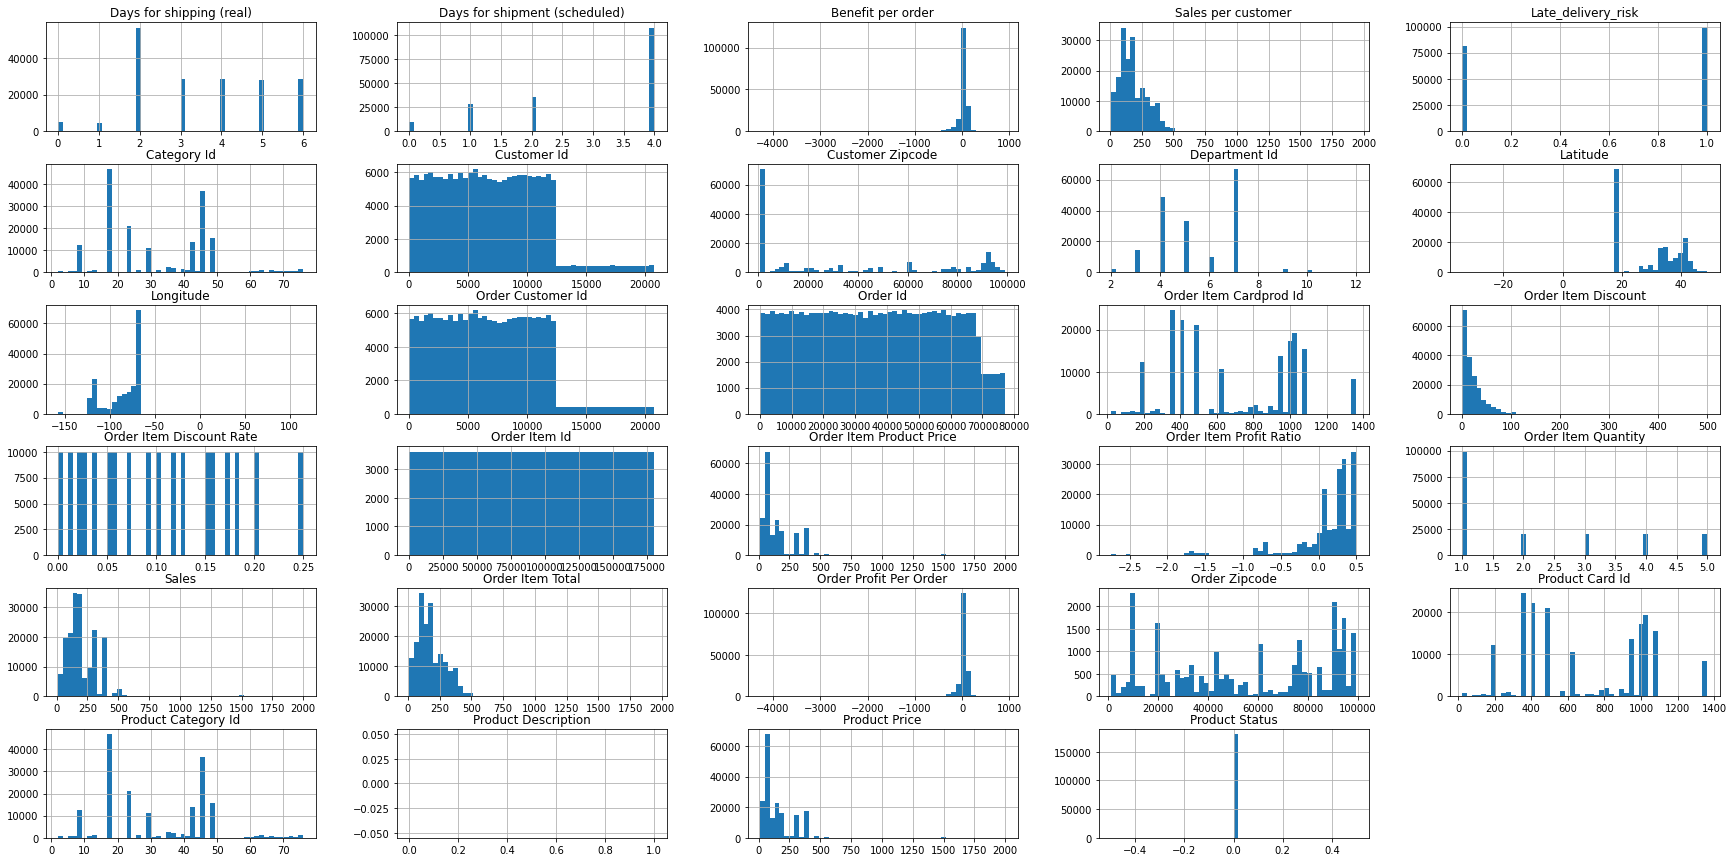

In [ ]:
df.hist(bins=50,figsize=(30, 15))
plt.show()

### **Identify missing values**

In [ ]:
def feature_missing_values(df):
  x = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
  print('Percentage of Missing Values: ', round(x,2), '%')

  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(col + ' - ' + str(df[col].isnull().sum()) + ' missing values')

feature_missing_values(df)

Percentage of Missing Values:  3.51 %
Customer Lname - 8 missing values
Customer Zipcode - 3 missing values
Order Zipcode - 155679 missing values
Product Description - 180519 missing values


### **Identify columns that have only 1 unique value**

In [ ]:
def check_unique_val(df):
  flag = False
  unique_val_cols = []
  for col in df.columns:
    num_unique_val = len(df[col].value_counts())
    if num_unique_val == 1:
      print(col, " has only 1 unique value: ", df[col].value_counts().index[0])
      unique_val_cols.append(col)
      flag != flag
  if flag:
    return unique_val_cols
  else:
    return "Not any columns that have only 1 unique value"

unique_val_cols = check_unique_val(df)

Customer Email  has only 1 unique value:  XXXXXXXXX
Customer Password  has only 1 unique value:  XXXXXXXXX
Product Status  has only 1 unique value:  0


### **Identify Columns that have duplicate values**

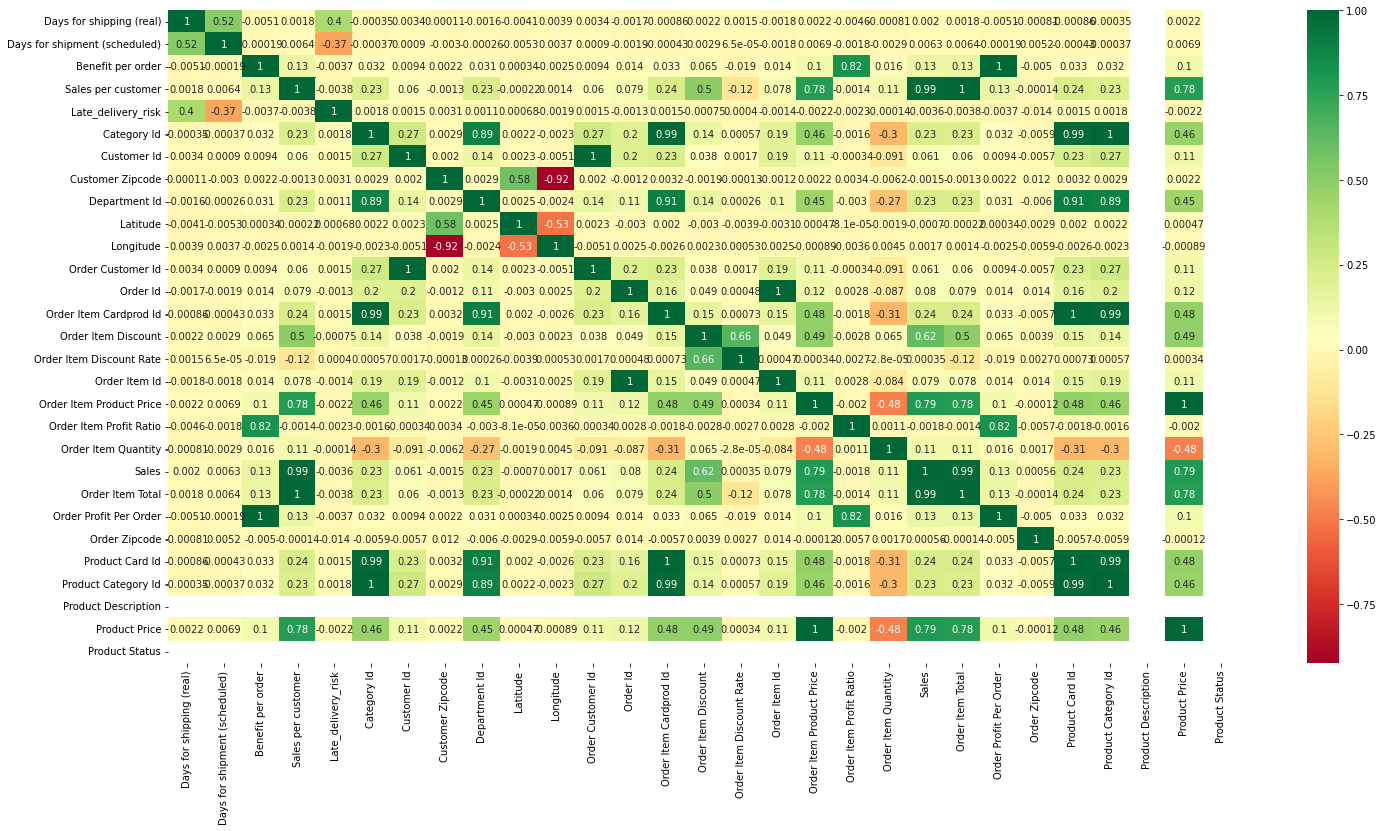

In [ ]:
plt.figure(figsize=(24,12))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

### **Check data is balance or not**

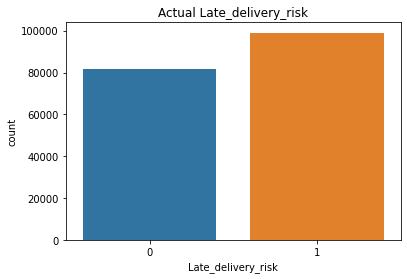

In [ ]:
bx = sns.countplot(x='Late_delivery_risk',data=df).set_title('Actual Late_delivery_risk')

**Insight**

1. **The original dataset includes**: 180,519 rows and 53 columns

2. **Names of attributes**: 
     *   Attribute names don't follow certain rules.
     *   Some properties are named ambiguously
     *  Attribute names containing space, can cause difficulties in processing
 
 Therefore, it is necessary to change the attribute name.

3. **Attributes containing NaN:** Customer Lname, Customer Zipcode, Order Zipcode, Product Description
4. **Attributes have only 1 unique value:** Customer Email, Customer Password, Status
5. **Columns that are similar with same values (maybe duplicate)**

      *   [Benefit per order] - Order Profit Per Order
      *   [Sales per customer] - Order Item Total, Sales
      *   [Category Id] - Order Item Cardprod Id, Product Card Id, Product Category Id
      *   [Order Customer Id] - Customer Id
      *   [Product Price] - Order Item Product Price
6. **The data is balanced so there is no need to do data balancing.**

## **Step 1. Rename columns**

### **Replace space with underline**

In [ ]:
names = {raw_name:raw_name.replace(" ", "_") for raw_name in df.columns}
df_prep = df.rename(columns=names)
df_prep.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### **Rename**

In [ ]:
df_prep.rename(columns={'Type':'Payment_Method'}, inplace=True)
df_prep.rename(columns={'Days_for_shipping_(real)':'Real_Days_Shipping'}, inplace=True)
df_prep.rename(columns={'Days_for_shipment_(scheduled)':'Scheduled_Days_Shipping'}, inplace=True)
df_prep.rename(columns={'Market':'Order_Market'}, inplace=True)
df_prep.rename(columns={'order_date_(DateOrders)':'Order_Date'}, inplace=True)
df_prep.rename(columns={'Order_Item_Quantity':'Quantity'}, inplace=True)
df_prep.rename(columns={'shipping_date_(DateOrders)':'Shipping_Date'}, inplace=True)
df_prep.rename(columns={'Late_delivery_risk':'Late_Delivery_Risk'}, inplace=True)
df_prep.rename(columns={'Order_Profit_Per_Order':'Order_Profit'}, inplace=True)

## **Step 2. Data cleaning**

###**Remove columns with missing values**

In [ ]:
df_prep.drop(['Order_Zipcode','Product_Description', 'Customer_Lname', 'Customer_Zipcode'], 
        axis='columns', inplace=True)

### **Remove columns that have duplicate values or same meaning**

In [ ]:
df_prep.drop(['Benefit_per_order','Sales_per_customer','Order_Item_Total','Product_Category_Id', 
              'Order_Customer_Id', 'Product_Card_Id', 'Product_Price'], 
             axis='columns', inplace=True)

### **Remove columns that have only 1 unique value**

In [ ]:
df_prep.drop(['Customer_Email','Customer_Password', 'Product_Status'], axis='columns', inplace=True)

### **Remove columns unnecessary columns**

In [ ]:
df_prep.drop(['Category_Id','Department_Id', 'Customer_Id', 'Order_Id', 
              'Order_Item_Id', 'Order_Item_Cardprod_Id'], axis='columns', inplace=True)

Delete attributes with different values, it is likely that this attribute will not help in the data mining process, on the contrary, it also causes error for the algorithm, so it can be deleted.

In [ ]:
df_prep.drop(['Product_Image', 'Product_Name', 'Customer_Fname'], axis='columns', inplace=True)

### **Identify or remove outliers**

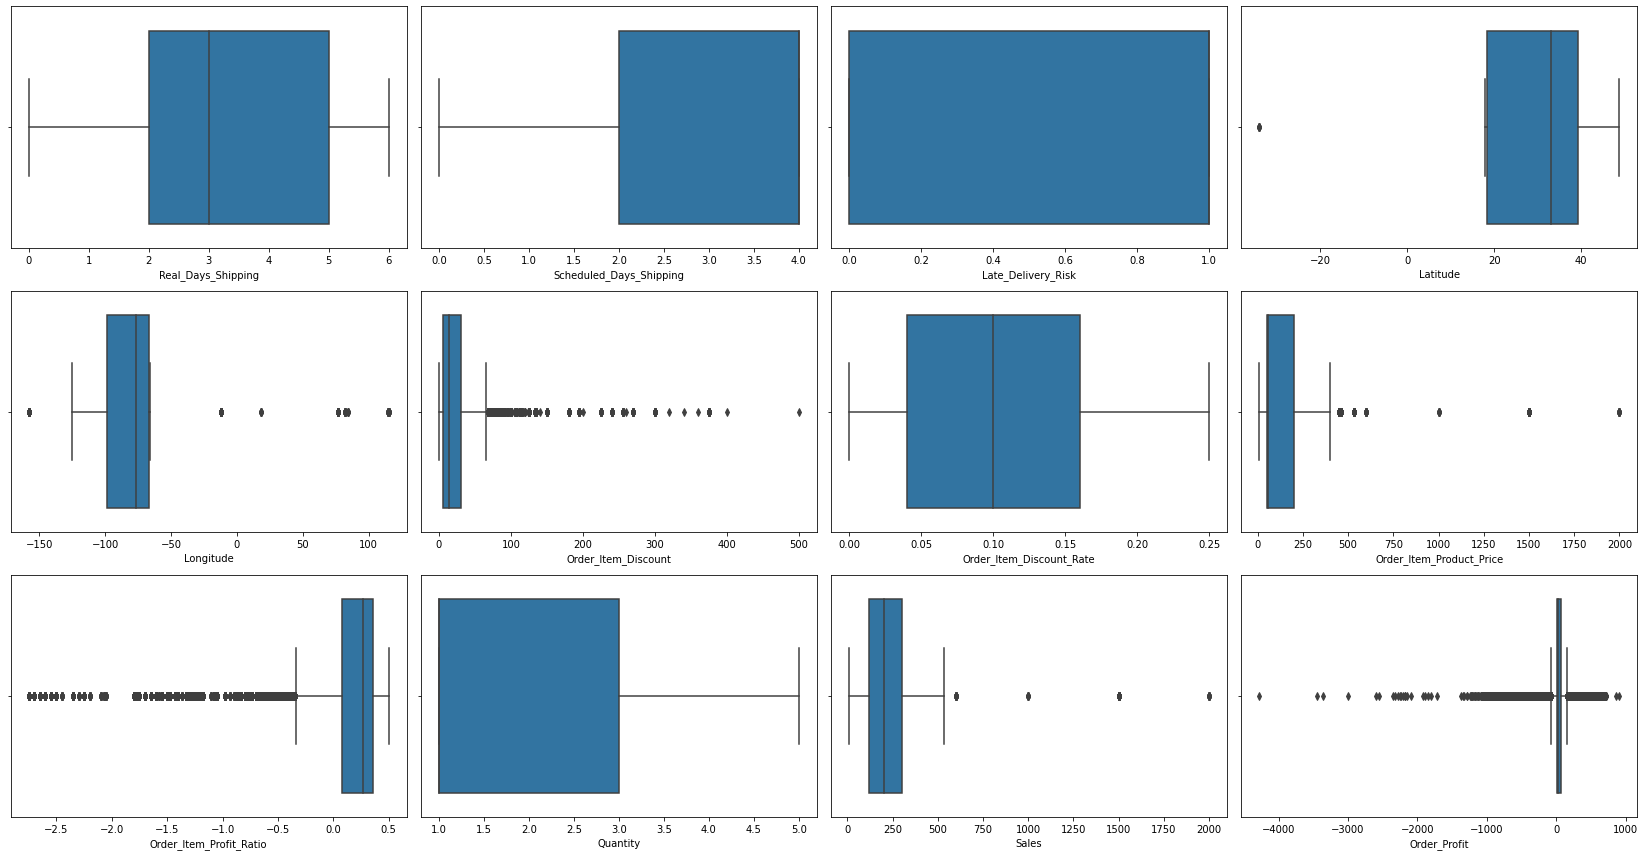

In [ ]:
numeric = df_prep.select_dtypes(exclude='object')

cols_to_check = [col for col in numeric.columns if col]

fig, ax = plt.subplots(3, 4, figsize = (23, 12))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df_prep[c], ax = ax[i])
fig.tight_layout()

In [ ]:
outlier_cols = ["Sales", "Order_Item_Discount", "Order_Item_Product_Price", "Order_Item_Profit_Ratio", 'Latitude', 'Longitude']

def outlier_thresholds(dataframe, variable):
    Q1 = df_prep[variable].quantile(0.25)
    Q3 = df_prep[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [ ]:
df_prep = HandleOutliers(df_prep)

Sales has 488 outliers
Order_Item_Discount has 7190 outliers
Order_Item_Product_Price has 1013 outliers
Order_Item_Profit_Ratio has 16473 outliers
Latitude has 6 outliers
Longitude has 1230 outliers


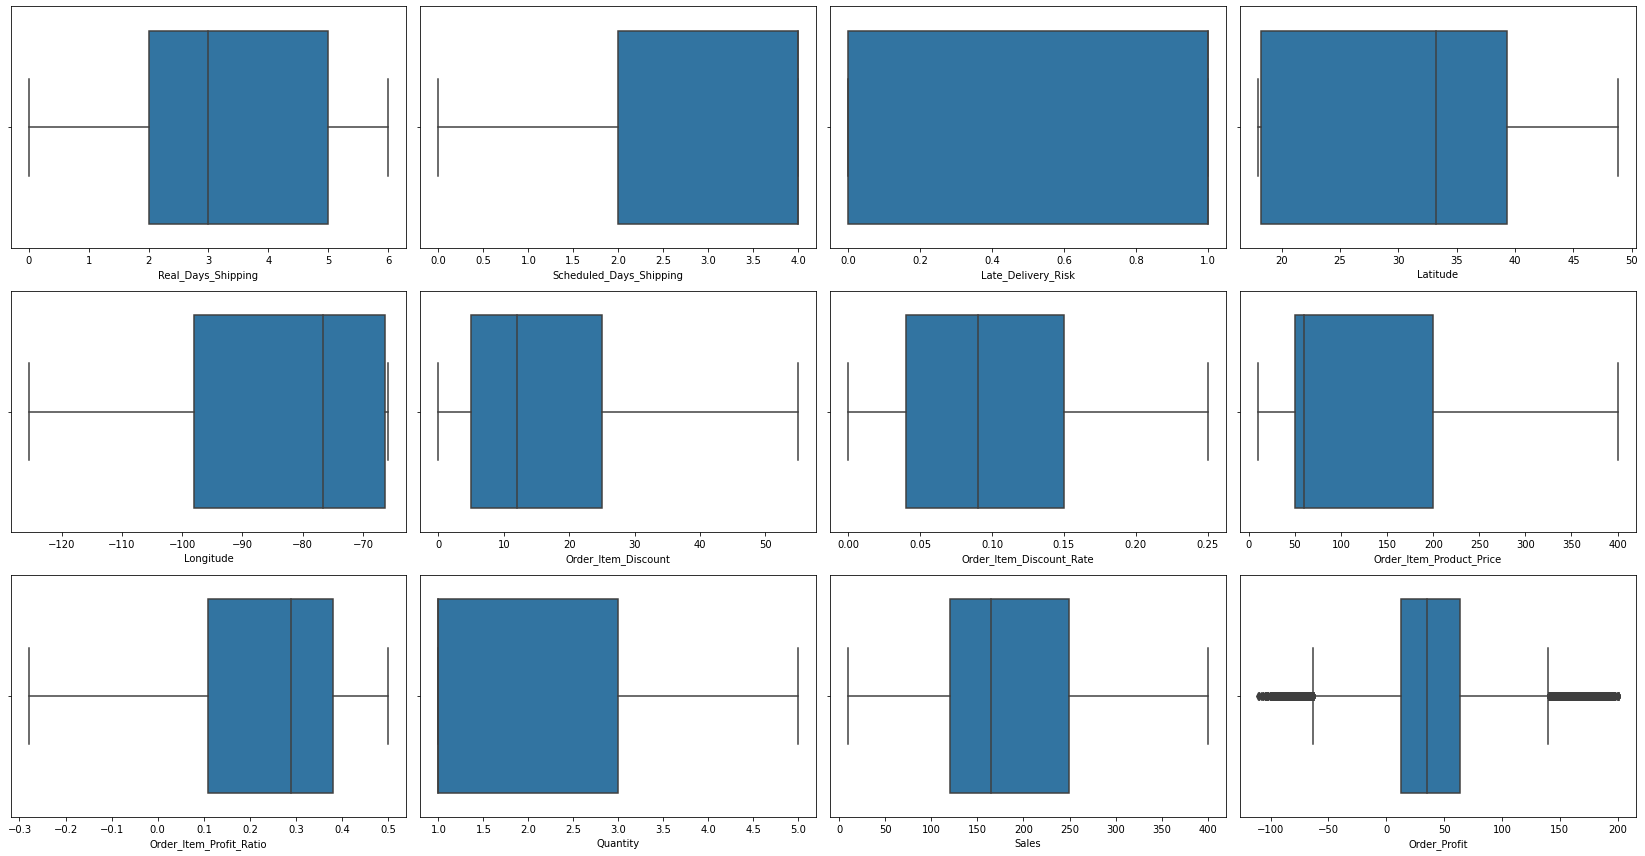

In [ ]:
numeric = df_prep.select_dtypes(exclude='object')

cols_to_check = [col for col in numeric.columns if col]

fig, ax = plt.subplots(3, 4, figsize = (23, 12))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df_prep[c], ax = ax[i])
fig.tight_layout()

In [ ]:
print("Number of columns of the original dataset: {}".format(len(df.columns)))
print("Number of columns of the dataset after deleting unnecessary columns: {}".format(len(df_prep.columns)))
print("Total number of columns deleted: {}".format(len(df.columns) - len(df_prep.columns)))
print("######################################################################")
print("Number of rows of the original dataset: {}".format(len(df)))
print("Number of rows of the dataset after deleting outliers: {}".format(len(df_prep)))
print("Total number of rows deleted: {}".format(len(df) - len(df_prep)))

Number of columns of the original dataset: 53
Number of columns of the dataset after deleting unnecessary columns: 30
Total number of columns deleted: 23
######################################################################
Number of rows of the original dataset: 180519
Number of rows of the dataset after deleting outliers: 154119
Total number of rows deleted: 26400


##**Step 3. Data transformation**

### **Change Datetime datatype**

We see that the`Order Date` and `Shipping Date` columns influence the delivery time, so we separate these columns into day, month and year columns. Then remove the original columns in the data set.

In [ ]:
df_prep['Order_Date'] = pd.to_datetime(df_prep['Order_Date'])
df_prep['Shipping_Date']=pd.to_datetime(df_prep['Shipping_Date'])

df_prep['Order_Year'] = pd.DatetimeIndex(df_prep['Order_Date']).year
df_prep['Order_Month'] = pd.DatetimeIndex(df_prep['Order_Date']).month
df_prep['Order_Day'] = pd.DatetimeIndex(df_prep['Order_Date']).day
df_prep['Shipping_Year'] = pd.DatetimeIndex(df_prep['Shipping_Date']).year
df_prep['Shipping_Month'] = pd.DatetimeIndex(df_prep['Shipping_Date']).month
df_prep['Shipping_Day'] = pd.DatetimeIndex(df_prep['Shipping_Date']).day

In [ ]:
df_prep.drop(['Shipping_Date', 'Order_Date'], axis='columns', inplace=True)

### **Encode categorical attributes**

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

df_prep['Payment_Method'] = le.fit_transform(df_prep['Payment_Method'])
df_prep['Shipping_Mode'] = le.fit_transform(df_prep['Shipping_Mode'])
df_prep['Order_Status'] = le.fit_transform(df_prep['Order_Status'])
df_prep['Order_Region'] = le.fit_transform(df_prep['Order_Region'])
df_prep['Order_Country'] = le.fit_transform(df_prep['Order_Country'])
df_prep['Order_City'] = le.fit_transform(df_prep['Order_City'])
df_prep['Order_Market'] = le.fit_transform(df_prep['Order_Market'])
df_prep['Delivery_Status'] = le.fit_transform(df_prep['Delivery_Status'])

df_prep['Category_Name'] = le.fit_transform(df_prep['Category_Name'])
df_prep['Customer_City'] = le.fit_transform(df_prep['Customer_City'])
df_prep['Customer_Country'] = le.fit_transform(df_prep['Customer_Country'])
df_prep['Customer_Segment'] = le.fit_transform(df_prep['Customer_Segment'])
df_prep['Customer_State'] = le.fit_transform(df_prep['Customer_State'])
df_prep['Customer_Street'] = le.fit_transform(df_prep['Customer_Street'])
df_prep['Department_Name'] = le.fit_transform(df_prep['Department_Name'])
df_prep['Order_State'] = le.fit_transform(df_prep['Order_State'])

df_prep.head()

,Payment_Method,Real_Days_Shipping,Scheduled_Days_Shipping,Delivery_Status,Late_Delivery_Risk,Category_Name,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Department_Name,Latitude,Longitude,Order_Market,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Profit_Ratio,Quantity,Sales,Order_Profit,Order_Region,Order_State,Order_Status,Shipping_Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,1,3,4,0,0,36,66,1,0,35,3547,4,18.251453,-66.037056,3,327,70,13.110000,0.04,327.75,0.29,1,327.75,91.250000,15,473,2,3,2018,1,31,2018,2,3
3,1,3,4,0,0,36,282,0,2,4,1743,4,34.125946,-118.291016,3,3207,8,22.940001,0.07,327.75,0.08,1,327.75,22.860001,11,831,2,3,2018,1,13,2018,1,16
4,2,2,4,0,0,36,66,1,1,35,6116,4,18.253769,-66.037048,3,3207,8,29.500000,0.09,327.75,0.45,1,327.75,134.210007,11,831,6,3,2018,1,13,2018,1,15
5,3,6,4,2,0,36,502,0,0,30,938,4,43.013969,-78.879066,3,3188,8,32.779999,0.10,327.75,0.06,1,327.75,18.580000,11,831,0,3,2018,1,13,2018,1,19
6,1,2,1,1,1,36,66,1,2,35,745,4,18.242538,-66.037056,3,1227,31,39.330002,0.12,327.75,0.33,1,327.75,95.180000,7,384,2,0,2018,1,13,2018,1,15


## **Step 4. Data reduction**

### **Attribute Selection**

#### **Chi-square test**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
categorical_features = df_prep[["Payment_Method", "Shipping_Mode", "Order_Status", 
                               "Order_Region", "Order_Country", "Order_City", "Order_Market", 
                               "Delivery_Status", "Category_Name", "Customer_City", "Customer_Country",
                               "Customer_Segment", "Customer_State",  "Customer_Street", "Department_Name",
                               "Order_State"]]


In [ ]:
best_features = SelectKBest(chi2, k=16)
best_features.fit(categorical_features, df_prep["Late_Delivery_Risk"])

SelectKBest(k=16, score_func=<function chi2 at 0x7f05832d8f80>)

In [ ]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["Payment_Method", "Shipping_Mode", "Order_Status", 
                               "Order_Region", "Order_Country", "Order_City", "Order_Market", 
                               "Delivery_Status", "Category_Name", "Customer_City", "Customer_Country",
                               "Customer_Segment", "Customer_State",  "Customer_Street", "Department_Name",
                               "Order_State"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
1,0.000000e+00,12943.901048,Shipping_Mode
7,0.000000e+00,4481.568192,Delivery_Status
5,1.269221e-173,789.092642,Order_City
9,1.753227e-96,434.443196,Customer_City
0,7.742247e-75,335.022673,Payment_Method
15,2.632004e-37,162.898998,Order_State
4,4.513080e-05,16.642399,Order_Country
3,8.550281e-05,15.432549,Order_Region
12,5.119432e-03,7.836759,Customer_State
2,5.103587e-02,3.807096,Order_Status


In [ ]:
df_score[df_score['p_values'] <= 0.05]['columns']

0      Payment_Method
1       Shipping_Mode
3        Order_Region
4       Order_Country
5          Order_City
7     Delivery_Status
9       Customer_City
12     Customer_State
15        Order_State
Name: columns, dtype: object

#### **Anova test**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
continous_features = df_prep[["Order_Profit", "Latitude", "Longitude", "Sales", "Order_Item_Discount", 
                            "Order_Item_Discount_Rate", "Order_Item_Product_Price", "Order_Item_Discount", "Order_Item_Profit_Ratio"]]

In [ ]:
best_features = SelectKBest(f_classif, k=9)
best_features.fit(continous_features , df_prep["Late_Delivery_Risk"])

SelectKBest(k=9)

In [ ]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["Order_Profit", "Latitude", "Longitude", "Sales", "Order_Item_Discount", 
                            "Order_Item_Discount_Rate", "Order_Item_Product_Price", "Order_Item_Discount", "Order_Item_Profit_Ratio"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
0,0.062318,3.474653,Order_Profit
3,0.178436,1.810618,Sales
2,0.295829,1.092909,Longitude
8,0.424092,0.638951,Order_Item_Profit_Ratio
4,0.616161,0.251301,Order_Item_Discount
7,0.616161,0.251301,Order_Item_Discount
6,0.756084,0.096490,Order_Item_Product_Price
1,0.845577,0.037933,Latitude
5,0.985150,0.000346,Order_Item_Discount_Rate


In [ ]:
df_score[df_score['p_values'] <= 0.05]['columns']

Series([], Name: columns, dtype: object)

In [ ]:
cols = ['Payment_Method','Shipping_Mode', 'Order_Region', 'Order_Country', 
        'Order_City', 'Delivery_Status', 'Customer_City',
        'Customer_State', 'Order_State', 'Order_Day', 'Order_Month', 'Order_Year',
         'Shipping_Day', 'Shipping_Month', 'Shipping_Year', 'Real_Days_Shipping',
        'Scheduled_Days_Shipping', 'Late_Delivery_Risk']
        
df_prep = df_prep[cols]

### **View data information after preprocessing**

In [ ]:
pd.set_option('display.max_columns', 18)
df_prep.head()

,Payment_Method,Shipping_Mode,Order_Region,Order_Country,Order_City,Delivery_Status,Customer_City,Customer_State,Order_State,Order_Day,Order_Month,Order_Year,Shipping_Day,Shipping_Month,Shipping_Year,Real_Days_Shipping,Scheduled_Days_Shipping,Late_Delivery_Risk
0,1,3,15,70,327,0,66,35,473,31,1,2018,3,2,2018,3,4,0
3,1,3,11,8,3207,0,282,4,831,13,1,2018,16,1,2018,3,4,0
4,2,3,11,8,3207,0,66,35,831,13,1,2018,15,1,2018,2,4,0
5,3,3,11,8,3188,2,502,30,831,13,1,2018,19,1,2018,6,4,0
6,1,0,7,31,1227,1,66,35,384,13,1,2018,15,1,2018,2,1,1


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147852 entries, 0 to 180518
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Payment_Method           147852 non-null  int64
 1   Shipping_Mode            147852 non-null  int64
 2   Order_Region             147852 non-null  int64
 3   Order_Country            147852 non-null  int64
 4   Order_City               147852 non-null  int64
 5   Delivery_Status          147852 non-null  int64
 6   Customer_City            147852 non-null  int64
 7   Customer_State           147852 non-null  int64
 8   Order_State              147852 non-null  int64
 9   Order_Day                147852 non-null  int64
 10  Order_Month              147852 non-null  int64
 11  Order_Year               147852 non-null  int64
 12  Shipping_Day             147852 non-null  int64
 13  Shipping_Month           147852 non-null  int64
 14  Shipping_Year            147852 non-

In [ ]:
df_prep.describe()

,Payment_Method,Shipping_Mode,Order_Region,Order_Country,Order_City,Delivery_Status,Customer_City,Customer_State,Order_State,Order_Day,Order_Month,Order_Year,Shipping_Day,Shipping_Month,Shipping_Year,Real_Days_Shipping,Scheduled_Days_Shipping,Late_Delivery_Risk
count,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000
mean,1.675473,2.233396,12.094574,65.274071,1834.035813,1.171144,191.914841,25.247301,548.507819,15.717109,6.190102,2015.958256,15.686890,6.213700,2015.965939,3.494819,2.929741,0.547913
std,0.994688,1.101813,6.983243,41.863336,999.623767,0.980011,159.627681,13.042172,306.447125,8.825455,3.389369,0.826160,8.806461,3.383293,0.827568,1.626132,1.376473,0.497701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,6.000000,38.000000,934.000000,1.000000,66.000000,14.000000,290.000000,8.000000,3.000000,2015.000000,8.000000,3.000000,2015.000000,2.000000,2.000000,0.000000
50%,2.000000,3.000000,12.000000,53.000000,1929.000000,1.000000,92.000000,34.000000,524.000000,16.000000,6.000000,2016.000000,16.000000,6.000000,2016.000000,3.000000,4.000000,1.000000
75%,3.000000,3.000000,18.000000,102.000000,2760.000000,1.000000,321.000000,35.000000,831.000000,23.000000,9.000000,2017.000000,23.000000,9.000000,2017.000000,5.000000,4.000000,1.000000
max,3.000000,3.000000,22.000000,163.000000,3576.000000,3.000000,559.000000,44.000000,1084.000000,31.000000,12.000000,2018.000000,31.000000,12.000000,2018.000000,6.000000,4.000000,1.000000


### **Save dataset after preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_prep.to_csv('/content/drive/My Drive/BA_data/dataco_supply_chain_processed_data.csv', index=False)

In [ ]:
df = df_prep

# **Chapter 3. Model Building**

In [ ]:
from datetime import datetime, timedelta
import time
import joblib
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [ ]:
features = df.drop(['Real_Days_Shipping','Scheduled_Days_Shipping'],axis=1)
labels = df[['Real_Days_Shipping','Scheduled_Days_Shipping']]

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(features,labels,test_size=0.20)

## **Building decision tree using the ID3 algorithm**

In [ ]:
ID3_start_time = time.time()

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(x_train, y_train)

# Predict the response for test dataset
tree_pred = clf.predict(x_test)

ID3_end_time = time.time()
ID3_execution_time = ID3_end_time - ID3_start_time

In [ ]:
Prediction = pd.DataFrame(tree_pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2,1
1,4,4
2,3,4
3,3,2
4,2,4


In [ ]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2,1,1
1,4,4,0
2,3,4,0
3,3,2,1
4,2,4,0


In [ ]:
l = prediction['risk']
m = x_test['Late_Delivery_Risk']
ID3_accuracy_score = accuracy_score(l,m)

In [ ]:
print('1) The accuracy of the risk predictor model is :', ID3_accuracy_score)
print('2) The algorithm execution time is:', timedelta(seconds=round(ID3_execution_time, 4)))
print('3) The AUROC score is :', roc_auc_score(l,m))
print('4) Some of the key classification metrics are :')
print(classification_report(l,m))

1) The accuracy of the risk predictor model is : 0.9765986946670725
2) The algorithm execution time is: 0:00:01.108000
3) The AUROC score is : 0.9795629060838748
4) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     12641
           1       1.00      0.96      0.98     16930

    accuracy                           0.98     29571
   macro avg       0.97      0.98      0.98     29571
weighted avg       0.98      0.98      0.98     29571



Text(0.5, 1.0, 'ID3 Decision Tree Accuracy Scrore: 0.9765986946670725')

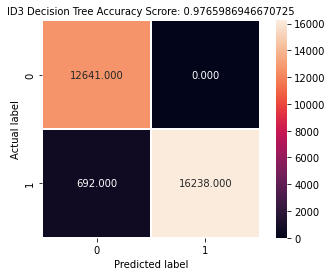

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(l,m), annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'ID3 Decision Tree Accuracy Scrore: {0}'.format(accuracy_score(l,m))
plt.title(title, size=10)

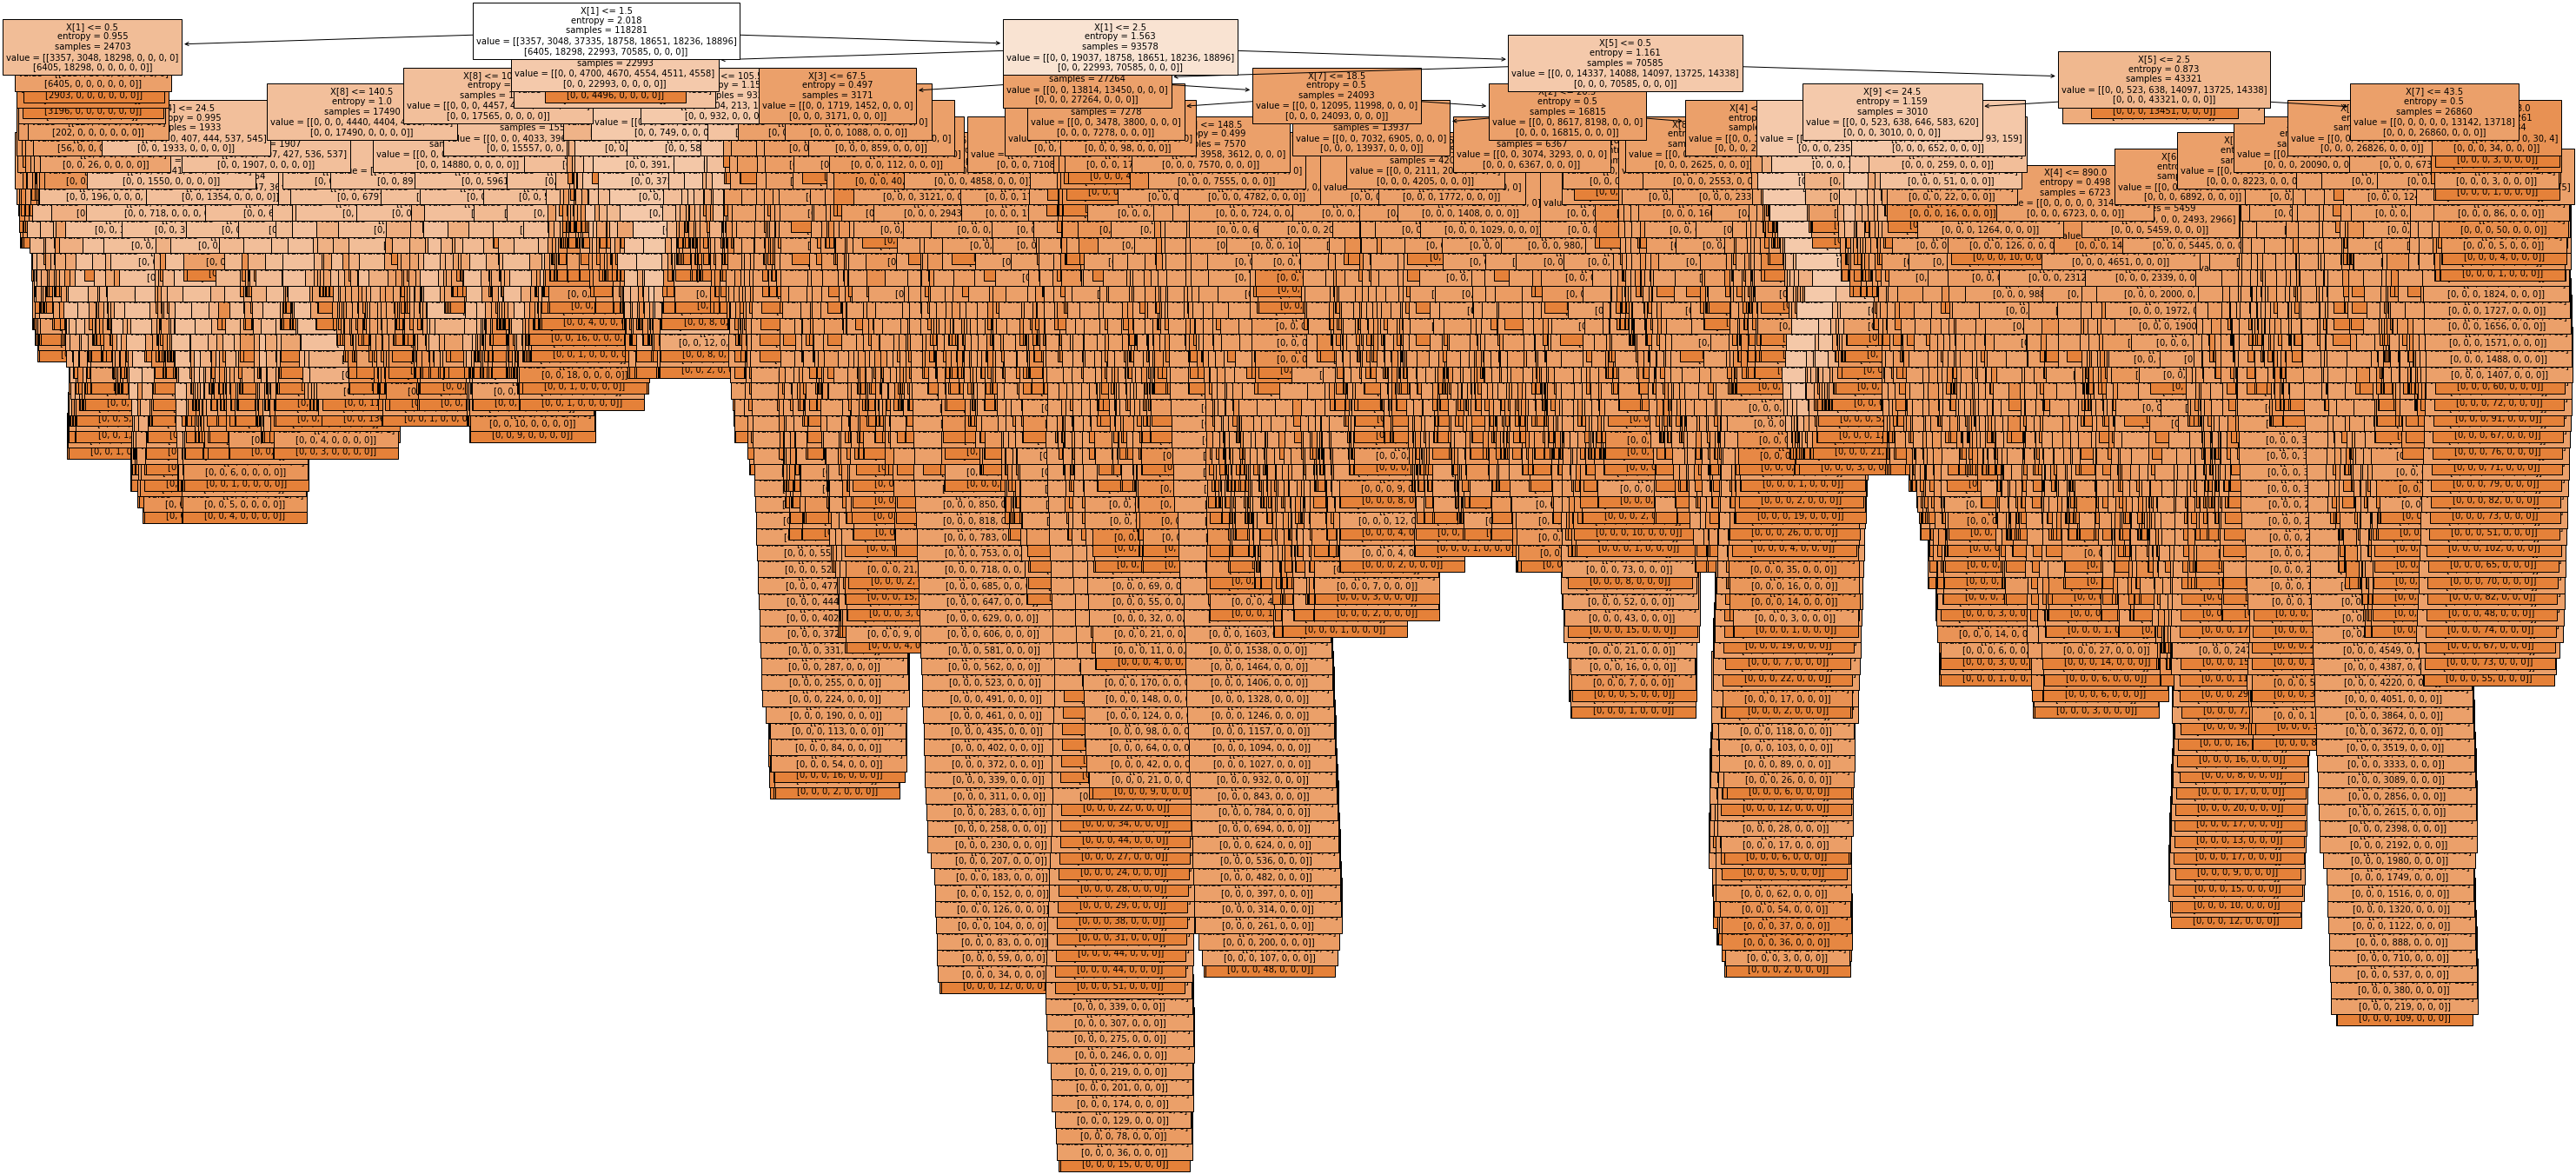

In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('ID3_decision_tree', dpi=100)
plt.show()

In [ ]:
# Save the model as a pickle in a file
joblib.dump(clf, '/content/drive/My Drive/BA_data/ID3_prediction_model.pkl')

## **Building decision tree using the CART algorithm**

In [ ]:
CART_start_time = time.time()

clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf.fit(x_train, y_train)

# Predict the response for test dataset
tree_pred = clf.predict(x_test)

CART_end_time = time.time()
CART_execution_time = CART_end_time - CART_start_time

In [ ]:
CART_execution_time

1.0701026916503906

In [ ]:
Prediction = pd.DataFrame(tree_pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2,1
1,4,4
2,2,4
3,3,2
4,2,4


In [ ]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2,1,1
1,4,4,0
2,2,4,0
3,3,2,1
4,2,4,0


In [ ]:
l = prediction['risk']
m = x_test['Late_Delivery_Risk']
CART_accuracy_score = accuracy_score(l,m)

In [ ]:
print('1) The accuracy of the risk predictor model is :', CART_accuracy_score)
print('2) The algorithm execution time is:', timedelta(seconds=round(CART_execution_time, 2)))
print('3) The AUROC score is :', roc_auc_score(l,m))
print('4) Some of the key classification metrics are :')
print(classification_report(l,m))

1) The accuracy of the risk predictor model is : 0.9765648777518515
2) The algorithm execution time is: 0:00:01.070000
3) The AUROC score is : 0.9795345815368259
4) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     12640
           1       1.00      0.96      0.98     16931

    accuracy                           0.98     29571
   macro avg       0.97      0.98      0.98     29571
weighted avg       0.98      0.98      0.98     29571



Text(0.5, 1.0, 'CART Decision Tree Accuracy Scrore: 0.9765648777518515')

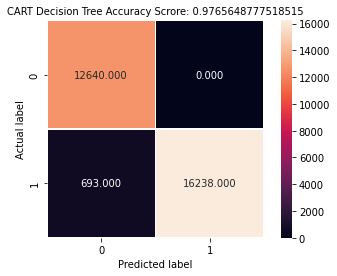

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(l,m), annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'CART Decision Tree Accuracy Scrore: {0}'.format(accuracy_score(l,m))
plt.title(title, size=10)

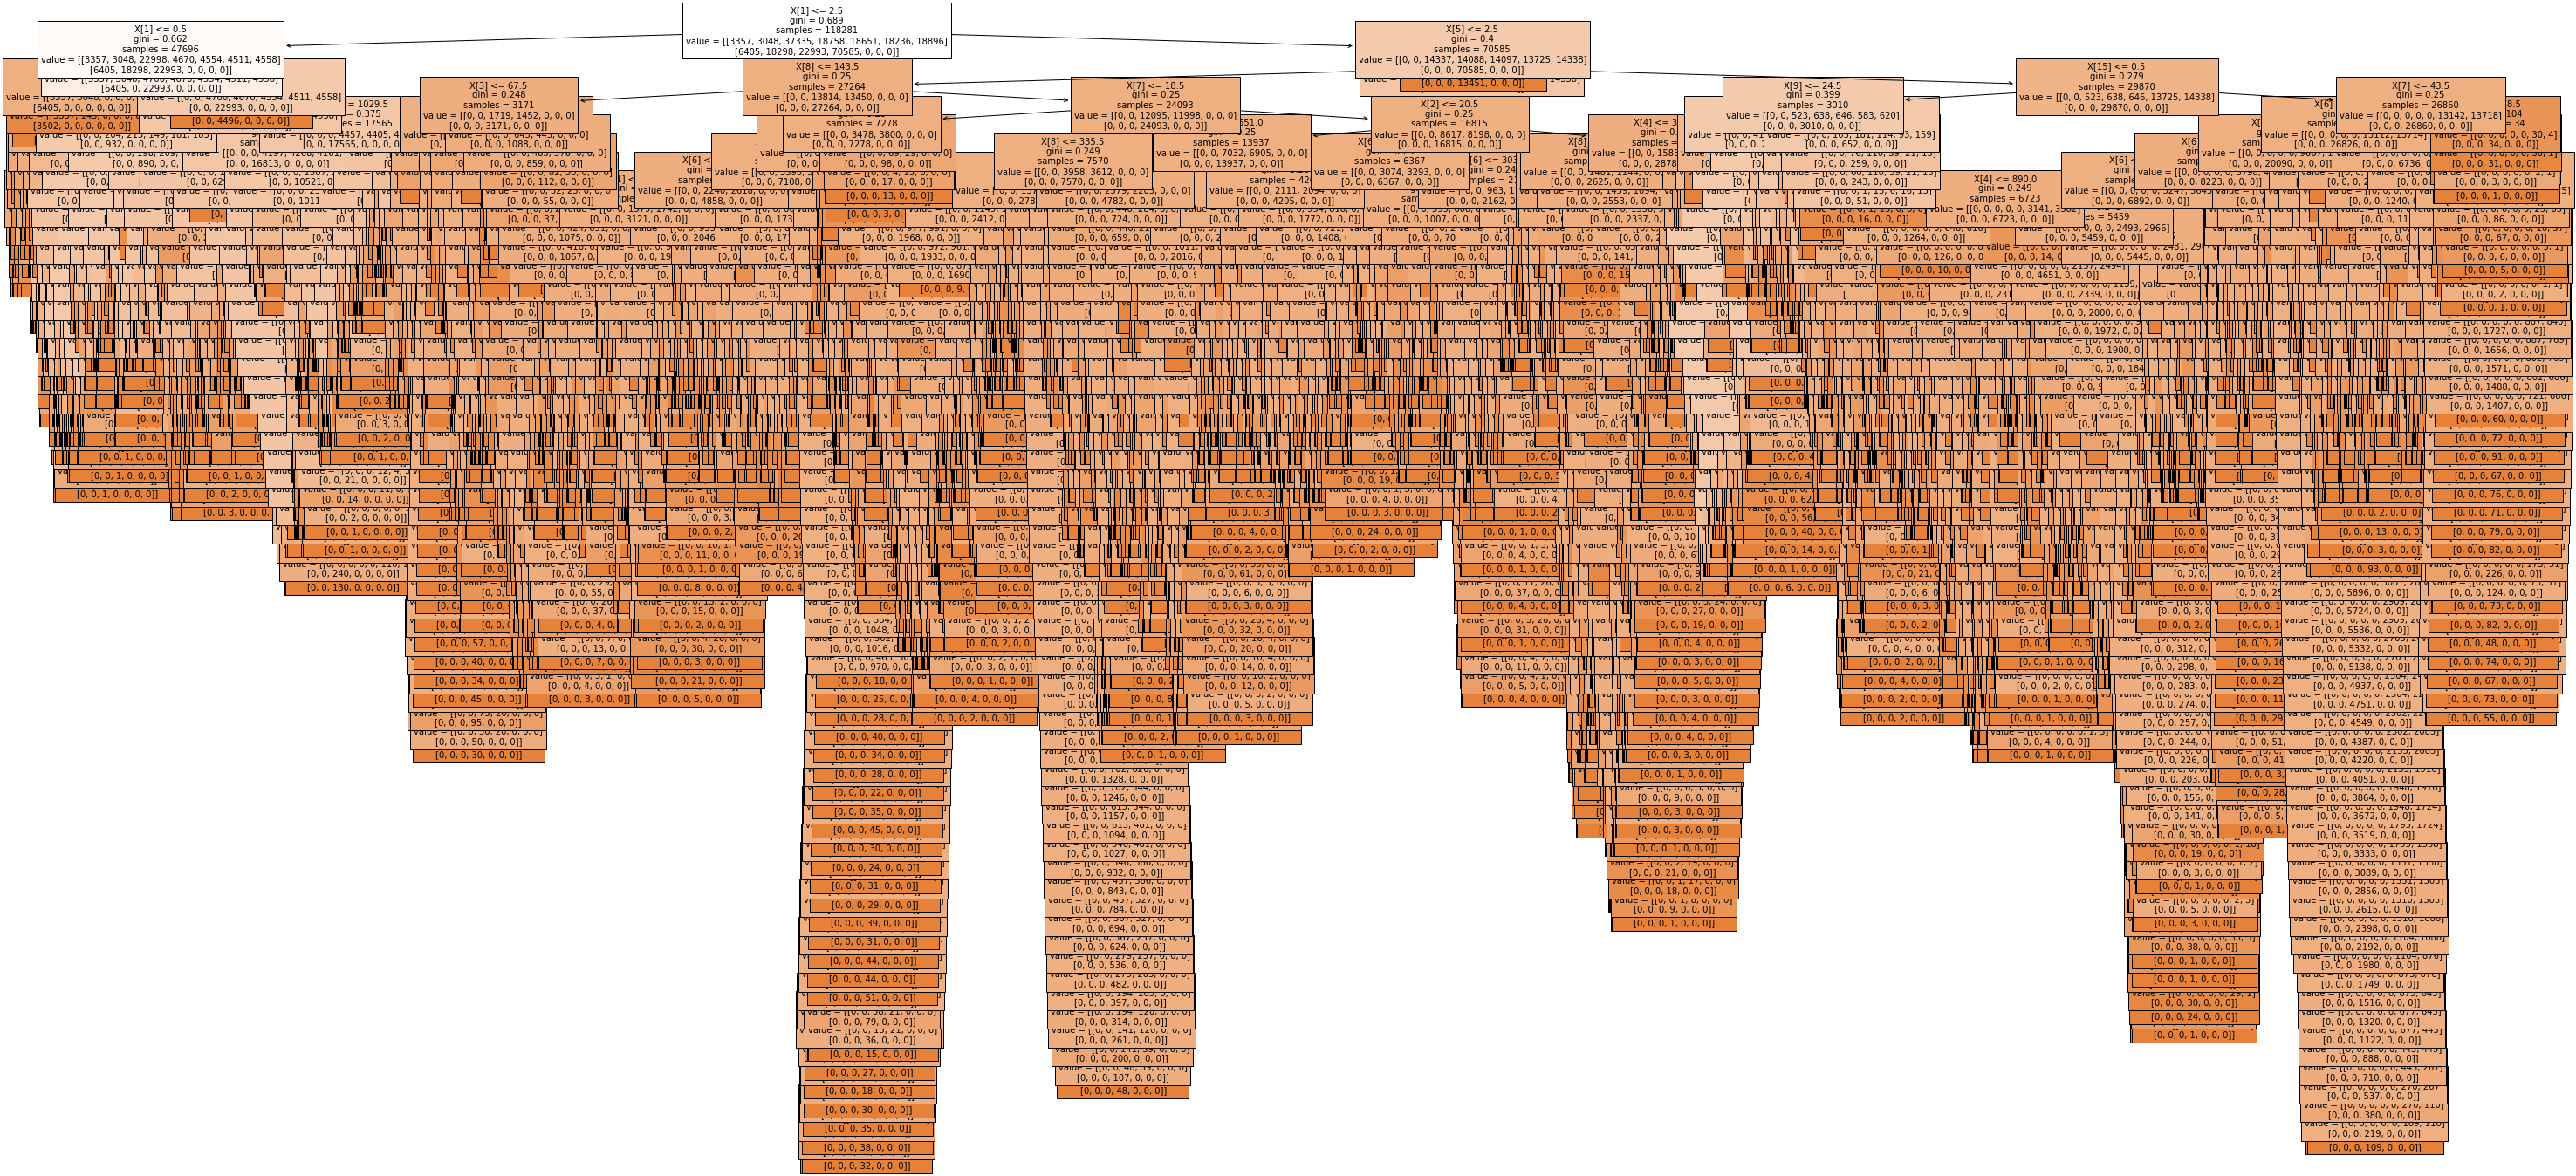

In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('cart_decision_tree', dpi=100)
plt.show()

In [ ]:
# Save the model as a pickle in a file
joblib.dump(clf, '/content/drive/My Drive/BA_data/CART_prediction_model.pkl')

## **Building predictive models using Naïve Bayes algorithm**

In [ ]:
start_time = time.time()

gnb1 = GaussianNB()
gnb2 = GaussianNB()

bayes_pred_r = gnb1.fit(x_train, y_train['Real_Days_Shipping']).predict(x_test)
bayes_pred_s = gnb2.fit(x_train, y_train['Scheduled_Days_Shipping']).predict(x_test)

bayes_pred = pd.concat([pd.Series(bayes_pred_r), pd.Series(bayes_pred_s)], axis = 1)

end_time = time.time()
NB_execution_time = end_time - start_time

In [ ]:
Prediction = pd.DataFrame(bayes_pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2,1
1,4,4
2,3,4
3,5,2
4,3,4


In [ ]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2,1,1
1,4,4,0
2,3,4,0
3,5,2,1
4,3,4,0


In [ ]:
l = prediction['risk']
m = x_test['Late_Delivery_Risk']
NB_accuracy_score = accuracy_score(l,m)

In [ ]:
print('1) The accuracy of the risk predictor model is :', accuracy_score(l,m))
print('2) The algorithm execution time is:', timedelta(seconds=round(NB_execution_time, 4)))
print('3) The AUROC score is :', roc_auc_score(l,m))
print('4) Some of the key classification metrics are :')
print(classification_report(l,m))

1) The accuracy of the risk predictor model is : 0.9495451624902776
2) The algorithm execution time is: 0:00:00.149100
3) The AUROC score is : 0.9579244218838128
4) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11841
           1       1.00      0.92      0.96     17730

    accuracy                           0.95     29571
   macro avg       0.94      0.96      0.95     29571
weighted avg       0.96      0.95      0.95     29571



Text(0.5, 1.0, 'Naïve Bayes Accuracy Scrore: 0.9495451624902776')

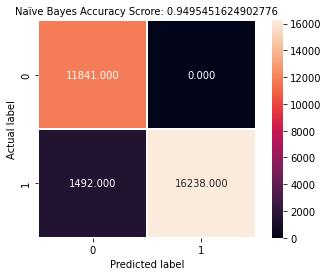

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(l,m), annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naïve Bayes Accuracy Scrore: {0}'.format(accuracy_score(l,m))
plt.title(title, size=10)

In [ ]:
# Save the model as a pickle in a file
joblib.dump(gnb1, 'Real_Days_Shipping_GNB_model.pkl')
joblib.dump(gnb2, 'Scheduled_Days_Shipping_GNB_model.pkl')

## **Building predictive models using Logistic Regression algorithm**

In [ ]:
LR_start_time = time.time()

lr1 = LogisticRegression(solver='liblinear', random_state=0)
lr2 = LogisticRegression(solver='liblinear', random_state=0)
lr_pred_r = lr1.fit(x_train, y_train['Real_Days_Shipping']).predict(x_test)
lr_pred_s = lr2.fit(x_train, y_train['Scheduled_Days_Shipping']).predict(x_test)

lr_pred = pd.concat([pd.Series(lr_pred_r), pd.Series(lr_pred_s)], axis = 1)

LR_end_time = time.time()
LR_execution_time = LR_end_time - LR_start_time

In [ ]:
Prediction = pd.DataFrame(lr_pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2,1
1,4,4
2,2,4
3,5,2
4,2,4


In [ ]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2,1,1
1,4,4,0
2,2,4,0
3,5,2,1
4,2,4,0


In [ ]:
l = prediction['risk']
m = x_test['Late_Delivery_Risk']
LR_accuracy_score =  accuracy_score(l,m)

In [ ]:
print('1) The accuracy of the risk predictor model is :', LR_accuracy_score)
print('2) The algorithm execution time is:', timedelta(seconds=round(LR_execution_time, 4)))
print('3) The AUROC score is :', roc_auc_score(l,m))
print('4) Some of the key classification metrics are :')
print(classification_report(l,m))

1) The accuracy of the risk predictor model is : 0.932129451151466
2) The algorithm execution time is: 0:00:34.397700
3) The AUROC score is : 0.9341753223066954
4) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12634
           1       0.96      0.92      0.94     16937

    accuracy                           0.93     29571
   macro avg       0.93      0.93      0.93     29571
weighted avg       0.93      0.93      0.93     29571



Text(0.5, 1.0, 'Logistic Regression Accuracy Scrore: 0.932129451151466')

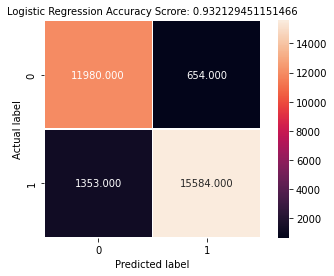

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(l,m), annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Scrore: {0}'.format(accuracy_score(l,m))
plt.title(title, size=10)

In [ ]:
# Save the model as a pickle in a file
joblib.dump(lr1, 'Real_Days_Shipping_LR_model.pkl')
joblib.dump(lr2, 'Scheduled_Days_Shipping_LR_model.pkl')

# **Chapter 4. Evaluation**

## **Evaluation of Algorithm Runtime**

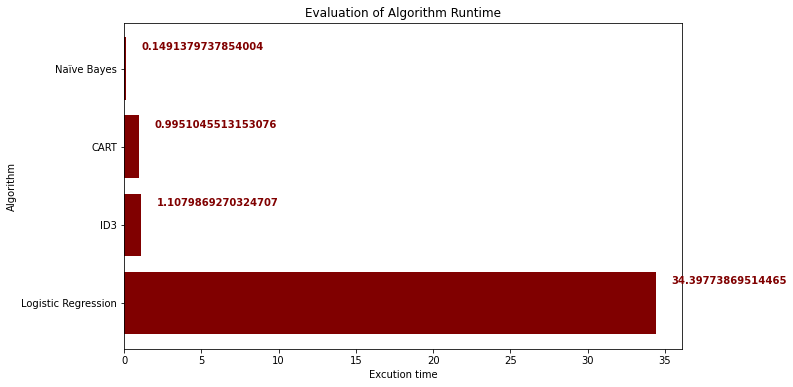

In [ ]:
excution_time_lst = [['ID3', ID3_execution_time], ['CART', CART_execution_time],
       ['Naïve Bayes', NB_execution_time], ['Logistic Regression', LR_execution_time]]
    
df = pd.DataFrame(excution_time_lst, columns =['Algorithm', 'Excution_Time']).sort_values(
    by=['Excution_Time'], ascending=False)
  
fig = plt.figure(figsize = (10, 6))

plt.barh(df['Algorithm'], df['Excution_Time'], color ='maroon')
 
plt.ylabel("Algorithm")
plt.xlabel("Excution time")
plt.title("Evaluation of Algorithm Runtime")

for i, v in enumerate(df['Excution_Time']):
    plt.text(v + 1, i + .25, str(v),
            color = 'maroon', fontweight = 'bold')

plt.show()

## **Evaluation of the algorithm's accuracy**

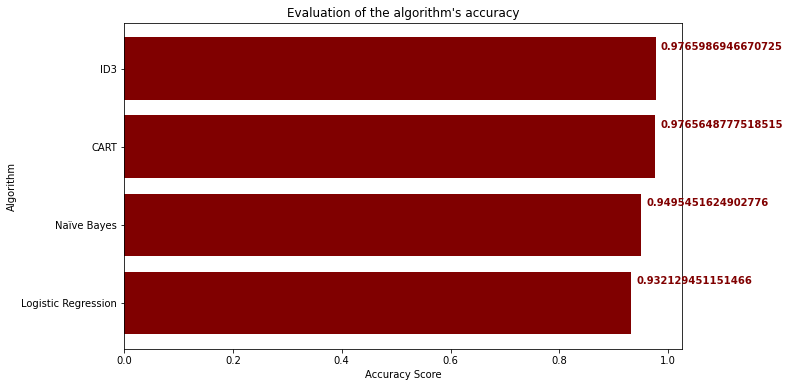

In [ ]:
accuracy_lst = [['ID3', ID3_accuracy_score], ['CART', CART_accuracy_score],
       ['Naïve Bayes', NB_accuracy_score], ['Logistic Regression', LR_accuracy_score]]
    
df = pd.DataFrame(accuracy_lst, columns =['Algorithm', 'Accuracy_Score']).sort_values(
    by=['Accuracy_Score'], ascending=True)
  
fig = plt.figure(figsize = (10, 6))

plt.barh(df['Algorithm'], df['Accuracy_Score'], color ='maroon')
 
plt.ylabel("Algorithm")
plt.xlabel("Accuracy Score")
plt.title("Evaluation of the algorithm's accuracy")

for i, v in enumerate(df['Accuracy_Score']):
    plt.text(v + 0.01, i + .25, str(v),
            color = 'maroon', fontweight = 'bold')

plt.show()